In [2]:
# Import the required modules
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

path = r"C:\Users\ushas\OneDrive\Desktop\Example\MyDataSet.csv"

In [4]:

def readCsv():
    data = pd.read_csv(path, names=['name', 'age', 'gender', 'sport'])
    return data

In [5]:
data = readCsv()
data.head(20)

,name,age,gender,sport
0,Ajay,32,M,FootBall
1,Mark,40,M,Neither
2,Jack,16,M,Cricket
3,Sara,20,F,Cricket
4,Zaira,34,F,Neither
5,Sachin,55,M,Cricket
6,Rahul,40,M,Neither
7,Pooja,21,F,Cricket
8,Smith,15,M,Neither
9,Lakshmi,55,F,FootBall


In [6]:
def categoricalToBinaryData(data):
    # Data of Gender is converted into Binary Data
    df_one = pd.get_dummies(data["gender"])
    
    # Binary Data is Concatenated into Dataframe
    df_two = pd.concat((df_one, data), axis=1)
    
    # Gendercolumn is dropped
    df_two = df_two.drop(["gender"], axis=1)
    
    # We want Male =0 and Female =1 So we drop Male column here
    df_two = df_two.drop(["M"], axis=1)
    
    # Rename the Column
    result = df_two.rename(columns={"F": "gender"})
    
    # Return the Result
    return result

In [7]:
result = categoricalToBinaryData(data)
print(result)
result['sport'] = result['sport'].fillna("Unknown")

    gender      name  age     sport
0        0      Ajay   32  FootBall
1        0      Mark   40   Neither
2        0      Jack   16   Cricket
3        1      Sara   20   Cricket
4        1     Zaira   34   Neither
5        0    Sachin   55   Cricket
6        0     Rahul   40   Neither
7        1     Pooja   21   Cricket
8        0     Smith   15   Neither
9        1   Lakshmi   55  FootBall
10       0   Michael   30  FootBall
11       1  Angelina    5   Cricket
12       1      Usha   10   Cricket
13       0      Yash   25   Neither
14       1   Venessa   32  Football


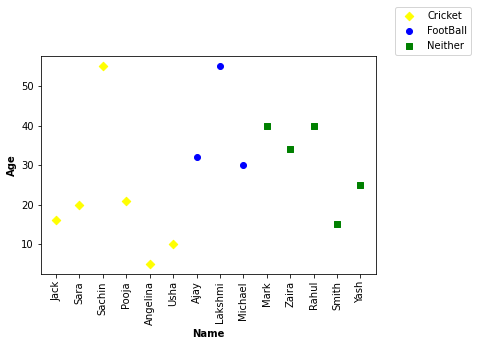

In [8]:
plt.scatter(result['name'][(result.sport == 'Cricket')],
            result['age'][(result.sport == 'Cricket')],
           marker='D',
           color='yellow',
           label='Cricket')
plt.scatter(result['name'][result.sport == 'FootBall'],
            result['age'][result.sport == 'FootBall'],
           marker='o',
           color='blue',
           label='FootBall')
plt.scatter(result['name'][result.sport == 'Neither'],
            result['age'][result.sport == 'Neither'],
           marker='s',
           color='green',
           label='Neither')
plt.xlabel('Name', fontweight='bold')
plt.xticks(rotation=90)
plt.ylabel('Age', fontweight='bold')
plt.legend(bbox_to_anchor =(1.30, 1.25))
plt.show()

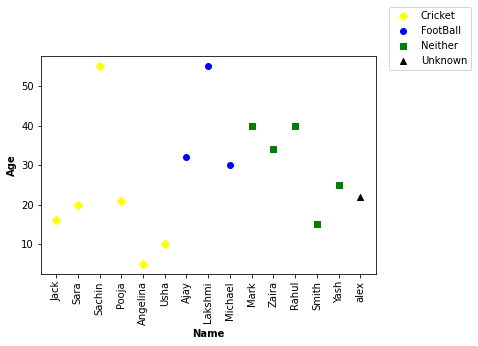

In [9]:
newName = input("Enter the name of a person: ")
newAge = input("Enter Age: ")
newGender = input("Enter Gender for Male enter M, for Female enter 0: ")
newSport = 'Unknown'
newData = {
    'name': [newName],
    'age': [newAge],
    'gender': [newGender],
    'sport': [newSport]
}
df = pd.DataFrame(newData)
 
# append data frame to CSV file
df.to_csv('MyDataSet.csv', mode='a', index=False, header=False)
apendedDataSet = readCsv()
result = categoricalToBinaryData(apendedDataSet)
# Plot
plt.scatter(result['name'][(result.sport == 'Cricket')],
            result['age'][(result.sport == 'Cricket')],
           marker='D',
           color='yellow',
           label='Cricket')
plt.scatter(result['name'][result.sport == 'FootBall'],
            result['age'][result.sport == 'FootBall'],
           marker='o',
           color='blue',
           label='FootBall')
plt.scatter(result['name'][result.sport == 'Neither'],
            result['age'][result.sport == 'Neither'],
           marker='s',
           color='green',
           label='Neither')
plt.scatter(result['name'][result.sport == 'Unknown'],
            result['age'][result.sport == 'Unknown'],
           marker='^',
           color='black',
           label='Unknown')
plt.xlabel('Name', fontweight='bold')
plt.xticks(rotation=90)
plt.ylabel('Age', fontweight='bold')
plt.legend(bbox_to_anchor =(1.30, 1.25))
plt.show()

In [10]:
import numpy as np
resultLen = result.__len__()
L1 = [result['age'].values[-1],result['gender'].values[-1]]
result['distance'] = result[['age', 'gender']].sub(np.array(L1)).pow(2).sum(1).pow(0.5)

In [11]:
result.head(20)

,gender,name,age,sport,distance
0,0,Ajay,32,FootBall,10.000000
1,0,Mark,40,Neither,18.000000
2,0,Jack,16,Cricket,6.000000
3,1,Sara,20,Cricket,2.236068
4,1,Zaira,34,Neither,12.041595
5,0,Sachin,55,Cricket,33.000000
6,0,Rahul,40,Neither,18.000000
7,1,Pooja,21,Cricket,1.414214
8,0,Smith,15,Neither,7.000000
9,1,Lakshmi,55,FootBall,33.015148


In [12]:
ascDataSet = result.sort_values('distance', ascending=True)
ascDataSet = ascDataSet.drop(ascDataSet.index[:1])
ascDataSet

,gender,name,age,sport,distance
7,1,Pooja,21,Cricket,1.414214
3,1,Sara,20,Cricket,2.236068
13,0,Yash,25,Neither,3.000000
2,0,Jack,16,Cricket,6.000000
8,0,Smith,15,Neither,7.000000
10,0,Michael,30,FootBall,8.000000
0,0,Ajay,32,FootBall,10.000000
14,1,Venessa,32,Football,10.049876
4,1,Zaira,34,Neither,12.041595
12,1,Usha,10,Cricket,12.041595


In [13]:
nearestNeighbors = ascDataSet.head(3)
nearestNeighbors

,gender,name,age,sport,distance
7,1,Pooja,21,Cricket,1.414214
3,1,Sara,20,Cricket,2.236068
13,0,Yash,25,Neither,3.000000


In [14]:
nearestNeighbors['sport'].mode()

0    Cricket
Name: sport, dtype: object